In [35]:
# import all modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# load data

df_linear_SSP1 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP1_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP1_LI = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP1_LI_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP1_LIRE = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP1_LIRE_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP1_RE = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP1_RE_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2_DAC = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_DAC_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2_LI = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_LI_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2_LIRE = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_LIRE_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2_RE = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_RE_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)


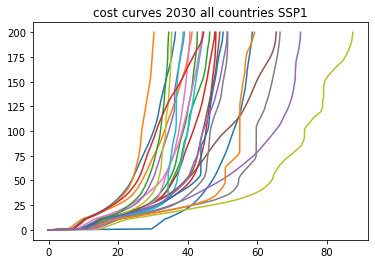

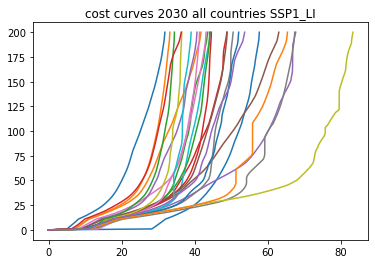

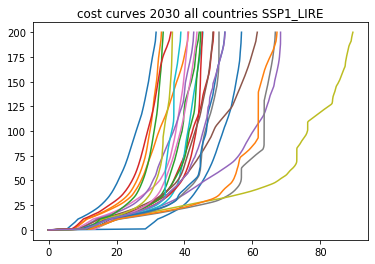

In [70]:
# plot data to visualise

def plot_curves(df, plot_title):
    
    year_index = []
    start_year = 2020

    for i in range (10, 90, 10):

        cur_year = start_year + i

        cur_index = df.index[df_linear_SSP1[1] == cur_year].tolist()

#         print(cur_index[0])

        year_index.append(cur_index[0])

    df_2030 = df[year_index[0]+1:year_index[1]]
    
    df_2030 = pd.DataFrame(df_2030)

    fig, ax = plt.subplots()

    for i in range(1, len(df.columns)):

        ax.plot(df_2030[i], range(0,201))

    ax.set(title='cost curves 2030 all countries ' + plot_title)
    
    
plot_curves(df_linear_SSP1, 'SSP1')
plot_curves(df_linear_SSP1_LI, 'SSP1_LI')
plot_curves(df_linear_SSP1_LIRE, 'SSP1_LIRE')

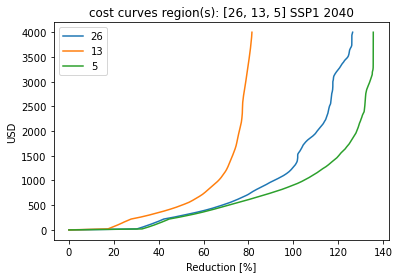

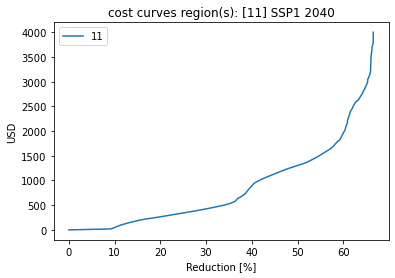

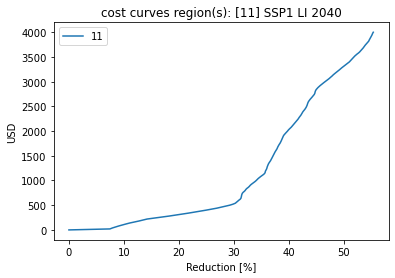

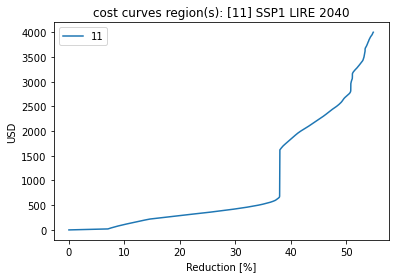

In [203]:
# df is the dataframe to be used (cubic, cubicroot, linear)
# plot_title, the title name (string)
# year which year should be plotted (int)
# regions is list like input ranging from 1:26 (int, list)

def plot_curves_year(df, plot_title, year, regions):
    
    year_index = []

    for i in range(0, 20, 10):
    
        cur_index = df.index[df_linear_SSP1[1] == year + i].tolist()

        year_index.append(cur_index[0])
            
    df_cur = df[year_index[0]+1:year_index[1]]
    
    df_cur = df_cur[regions]
    
    df_cur = pd.DataFrame(df_cur)

    fig, ax = plt.subplots()

    ax.plot(df_cur, range(0,4020,20))

    ax.set(title='cost curves region(s): ' + str(regions).strip() + ' ' + plot_title + ' ' + str(year))
    
    ax.set_ylabel('USD')
    
    ax.set_xlabel('Reduction [%]')
    
    ax.legend(df_cur.columns)
    
    return df_cur
    
df_2040 = plot_curves_year(df_linear_SSP1, 'SSP1', 2040, [26,13,5])

df_11_SSP1 = plot_curves_year(df_linear_SSP1, 'SSP1', 2040, [11])
df_11_SSP1_LI = plot_curves_year(df_linear_SSP1_LI, 'SSP1 LI', 2040, [11])
df_11_SSP1_LIRE = plot_curves_year(df_linear_SSP1_LIRE, 'SSP1 LIRE', 2040, [11])

df_11_SSP1.to_csv('C:/Users/toonv/Documents/PBL/Code/CSV/SSP1_11.csv')

In [39]:
# so now we want to see a specific reduction given a certain cost.

In [177]:
# generate random reduction figure

rand_cost = np.random.randint(0, 4000, size=1)

"""
This function calculates the average reduction for a random cost input. It takes into account 
the scenarios that are given as input and calculates the average between these different outputs.
This will help to built other thools which can use this data to define other curves.
"""

def find_reduction(cost, scenarios, columns, year, region):   

    if year < 2020 or year > 2100:
        raise Exception("Only years ranging from 2020 to 2100 in timesteps of 10")
        
    if region < 1 or region > 2100:
        raise Exception("Only regions ranging from 1 to 26")
    
    # empty df
    
    index = list(range(0,4020,20))

    all_scenarios = pd.DataFrame(columns=columns, index=index)
        
    column_index = 0
    
    for scenario in scenarios:
         

        # first calculate the costs (0~4000) for the given period
    
        year_index = []

        for i in range(0, 20, 10):
    
            cur_index = scenario.index[df_linear_SSP1[1] == year + i].tolist()
        
            year_index.append(cur_index[0])

        df_cur = scenario[year_index[0]+1:year_index[1]]

        df_cur = df_cur[region]

        df_cur = pd.DataFrame(df_cur)
        

        #  set index to USD (0:4000)
        
        df_cur['USD'] = index
        
        df_cur.set_index('USD', inplace=True, drop=True)
        
        df_cur.columns = ['Reduction [%]']
        

        #  append values of current timestep to total dataframe
                
        all_scenarios[columns[column_index]] = df_cur['Reduction [%]']
        
        column_index = column_index + 1
        
    print(all_scenarios)       

    # find reduction which is closest to random cost
    
    print(rand_cost)
    
    # value closest to random cost
    closest_value = min(index, key=lambda x:abs(x-rand_cost))
    
    # empty list for all reductions closest to random
    
    reductions = []
    
    for column in columns:
        
        reductions.append(all_scenarios[column][closest_value])
            
    avg_reduction = np.average(reductions)
    
    print('Average reduction: ', avg_reduction)
    
find_reduction(rand_cost, [df_linear_SSP1, df_linear_SSP1_LI, df_linear_SSP1_LIRE],
               ['SSP1','SSP1_LI','SSP1_LIRE'], 2040, 1)

         SSP1  SSP1_LI  SSP1_LIRE
0      0.0000   0.0000     0.0000
20    39.6480  37.0084    32.0772
40    40.3391  37.7598    32.7236
60    41.0858  38.5128    33.3678
80    41.8342  39.2333    34.0087
...       ...      ...        ...
3920  89.0005  92.4913    92.7623
3940  89.0147  92.5928    92.7660
3960  89.0288  92.6428    92.8189
3980  89.0426  92.6438    92.9335
4000  89.0498  92.6665    92.9916

[201 rows x 3 columns]
[2297]
Average reduction:  89.34876666666666


In [179]:
# curve fitting

index = list(range(0,4020,20))

df_11_SSP1['USD'] = index
        
df_11_SSP1.set_index('USD', inplace=True, drop=True)

print(df_11_SSP1)

           11
USD          
0      0.0000
20     9.1630
40     9.7058
60    10.2579
80    10.8145
...       ...
3920  66.5592
3940  66.5602
3960  66.5612
3980  66.5622
4000  66.5632

[201 rows x 1 columns]


Coefficients: 
 [0.01411494]
Mean squared error: 171.33
Coefficient of determination: -10962.29


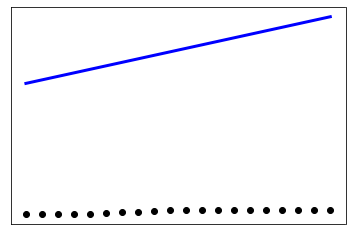

In [202]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
costs = list(range(0,4020,20))
reduction = df_11_SSP1[11].values

# Use only one feature
# costs = costs[:, np.newaxis, 2]

costs_list = []

for cost in costs:
    costs_list.append([cost])
    
costs = costs_list

# Split the data into training/testing sets
costs_train = costs[:-20]
costs_test = costs[-20:]

# Split the targets into training/testing sets
reduction_train = reduction[:-20]
reduction_test = reduction[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(costs_train, reduction_train)

# Make predictions using the testing set
reduction_pred = regr.predict(costs_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(reduction_test, reduction_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(reduction_test, reduction_pred))

# Plot outputs
plt.scatter(costs_test, reduction_test,  color='black')
plt.plot(costs_test, reduction_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


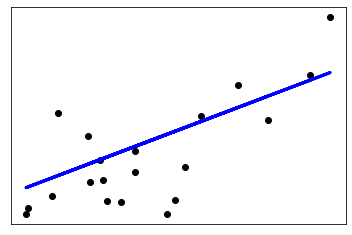

In [201]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()